In [1]:
#IMPORT DATA FIRST MODEL -> All data imported without a precedent division, therefore we expect low performances
from PIL import Image
import numpy as np
import os
from tensorflow.keras.utils import to_categorical

chinese_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_chinese'
ita_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_ita'

ALL_PATHS = [chinese_PATH, ita_PATH]

image_shape = (64, 64)
images = []
regression_info = []
class_labels = []

for current_path in ALL_PATHS:
    # List all image filenames (without extensions)
    image_filenames = [filename[:-4] for filename in os.listdir(current_path) if filename.endswith('.jpg')]

    # Load images, corresponding regression info, and class labels
    for image_filename in image_filenames:
        print(image_filename)
        # Create correct path to resources
        image_path = os.path.join(current_path, image_filename + '.jpg')
        information_path = os.path.join(current_path, image_filename + '.txt')

        # Load image
        image = Image.open(image_path)
        image = image.resize(image_shape)  # Resize to the desired input shape
        image_array = np.array(image) / 255.0  # Normalize pixel values
        images.append(image_array)

        # Load regression info from txt file
        with open(information_path, 'r') as f:
            possible_values = f.readline().strip().split(' ')
            regression_values = []
            for counter, value in enumerate(possible_values):
                if counter == 0: # First value always class
                    class_label = int(possible_values[0])
                else:
                    regression_values.append(float(possible_values[counter]))
            class_labels.append(class_label)
            regression_info.append(regression_values)

# Convert lists to numpy arrays
images = np.array(images)
regression_info = np.array(regression_info)
class_labels = np.array(class_labels)
class_labels_one_hot = to_categorical(class_labels) # Useful for categorical_crossentropy

# Split data into training and validation sets -> For example, 80% training, 20% validation
split_ratio = 0.8
num_samples = len(images)
split_index = int(num_samples * split_ratio)

# Train images
train_images = images[:split_index]
train_regression_info = regression_info[:split_index]
train_class_labels_one_hot = class_labels_one_hot[:split_index]

# Validation images
val_images = images[split_index:]
val_regression_info = regression_info[split_index:]
val_class_labels_one_hot = class_labels_one_hot[split_index:]

002_0001
002_0001_j
002_0002
002_0002_j
002_0003
002_0003_j
002_0004
002_0004_j
002_0005
002_0005_j
002_0006
002_0006_j
002_0007
002_0007_j
002_0008
002_0008_j
002_0009
002_0009_j
002_0010
002_0010_j
002_0011
002_0011_j
002_0012
002_0012_j
002_0013
002_0013_j
002_0014
002_0015
002_0016
002_0017
002_0018
002_0019
002_0020
002_0021
002_0022
002_0023
002_0024
002_0025
002_0026
002_0027
002_0028
002_0029
002_0030
002_0031
002_0032
002_0033
002_0034
002_0035
002_0036
002_0037
002_0038
002_0039
002_1_0001
002_1_0001_1_j
002_1_0002
002_1_0002_1_j
002_1_0003
002_1_0003_1_j
002_1_0004
002_1_0004_1_j
002_1_0005
002_1_0005_1_j
002_1_0006
002_1_0006_1_j
002_1_0007
002_1_0007_1_j
002_1_0008
002_1_0008_1_j
002_1_0009
002_1_0009_1_j
002_1_0010
002_1_0010_1_j
002_1_0011
002_1_0011_1_j
002_1_0012
002_1_0012_1_j
002_1_0013
002_1_0013_1_j
002_1_0014
002_1_0015
002_1_0016
002_1_0017
002_1_0018
002_1_0019
002_1_0020
002_1_0021
002_1_0022
002_1_0023
002_1_0024
002_1_0025
002_1_0026
002_1_0027
002_1_0028
002

In [2]:
#FINAL MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import plot_model

# Define input shape for the images
input_shape = (64, 64, 3)

inputs = keras.Input(shape=input_shape)
x = Conv2D(filters=16, kernel_size=2, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=2, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)

# Classification head for classification of the images' classes
classification_head = Dense(4, activation='softmax', name='classification')(x)

# Regression head for the location of the sign in the image
regression_head = Dense(4, activation='sigmoid', name='regression')(x)

# Build the final model
model = Model(inputs=inputs, outputs=[classification_head, regression_head])

# Define loss functions and weights
losses = {'classification': 'categorical_crossentropy', 'regression': 'mean_squared_error'}

# Optimizer with a lower learning rate
#optimizer = Adam(learning_rate=0.0001)

# Compile the model with multiple outputs
model.compile(optimizer='rmsprop', loss=losses, metrics=["accuracy"])

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 16)   208         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 16)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 30, 30, 32)   2080        ['max_pooling2d[0][0]']          
                                                                                              

In [3]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with regression and classification tasks
history=model.fit(
    x=train_images,
    y={'classification': train_class_labels_one_hot, 'regression': train_regression_info},
    validation_data=(val_images, {'classification': val_class_labels_one_hot, 'regression': val_regression_info}),
    epochs=10, # Adjust the number of epochs
    #callbacks=[callback],
    batch_size=32  # Adjust the batch size
)

Epoch 1/10
139/139 [==============================] - 7s 42ms/step - loss: 0.4099 - classification_loss: 0.4025 - regression_loss: 0.0073 - classification_accuracy: 0.8749 - regression_accuracy: 0.6040 - val_loss: 1.1278 - val_classification_loss: 1.1196 - val_regression_loss: 0.0081 - val_classification_accuracy: 0.5565 - val_regression_accuracy: 0.2963
Epoch 2/10
139/139 [==============================] - 6s 42ms/step - loss: 0.1730 - classification_loss: 0.1689 - regression_loss: 0.0041 - classification_accuracy: 0.9419 - regression_accuracy: 0.6833 - val_loss: 1.2047 - val_classification_loss: 1.2001 - val_regression_loss: 0.0046 - val_classification_accuracy: 0.5574 - val_regression_accuracy: 0.6134
Epoch 3/10
139/139 [==============================] - 6s 41ms/step - loss: 0.1352 - classification_loss: 0.1315 - regression_loss: 0.0037 - classification_accuracy: 0.9557 - regression_accuracy: 0.7145 - val_loss: 1.1396 - val_classification_loss: 1.1340 - val_regression_loss: 0.0056 -

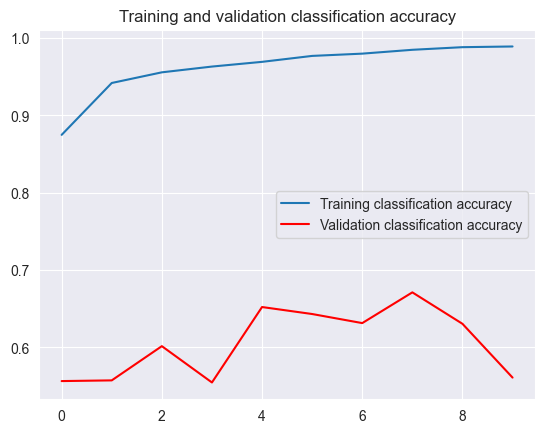

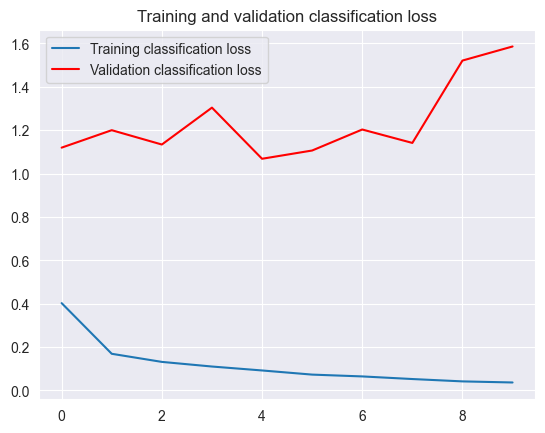

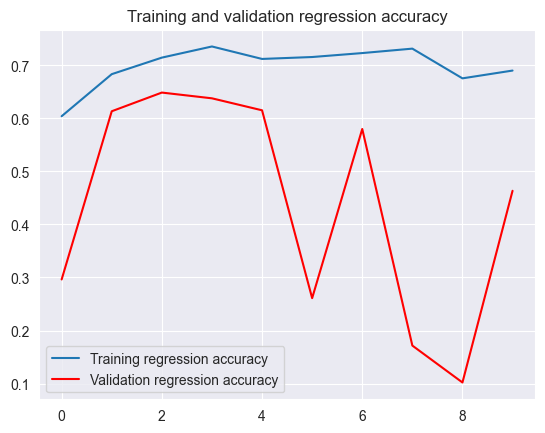

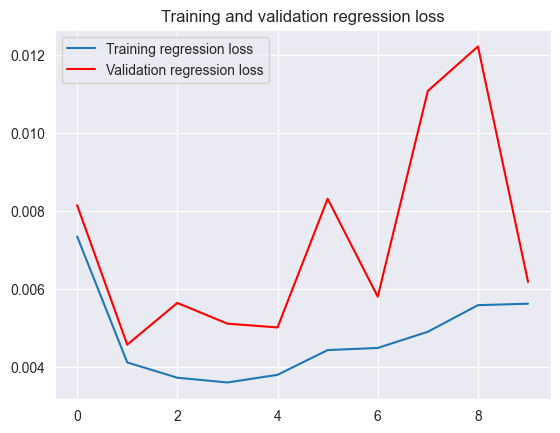

In [4]:
#Save model + save graphs
import matplotlib.pyplot as plt

generic_path = 'C:\\Users\\marru\\Pictures\\cnns'
if not os.path.exists(generic_path):
    os.mkdir(generic_path)
model_name='first_model'
save_path = os.path.join(generic_path, model_name)
if os.path.exists(save_path):
    print('Already exists!')
    raise KeyboardInterrupt
os.makedirs(save_path)
model.save(os.path.join(save_path, model_name+'.h5'))

class_acc = history.history['classification_accuracy']
val_class_acc = history.history['val_classification_accuracy']
class_loss = history.history['classification_loss']
val_class_loss = history.history['val_classification_loss']

regr_acc = history.history['regression_accuracy']
val_regr_acc = history.history['val_regression_accuracy']
regr_loss = history.history['regression_loss']
val_regr_loss = history.history['val_regression_loss']

epochs = range(10)

plt.title('Training and validation classification accuracy')
plt.plot(epochs, class_acc, label='Training classification accuracy')
plt.plot(epochs, val_class_acc, color='red', label='Validation classification accuracy')
plt.legend()
plt.savefig(os.path.join(save_path, 'classification_accuracy.png'))

plt.figure()

plt.title('Training and validation classification loss')
plt.plot(epochs, class_loss, label='Training classification loss')
plt.plot(epochs, val_class_loss, color='red', label='Validation classification loss')
plt.legend()
plt.savefig(os.path.join(save_path, 'classification_loss.png'))

plt.figure()

plt.title('Training and validation regression accuracy')
plt.plot(epochs, regr_acc, label='Training regression accuracy')
plt.plot(epochs, val_regr_acc, color='red', label='Validation regression accuracy')
plt.legend()
plt.savefig(os.path.join(save_path, 'regression_accuracy.png'))

plt.figure()

plt.title('Training and validation regression loss')
plt.plot(epochs, regr_loss, label='Training regression loss')
plt.plot(epochs, val_regr_loss, color='red', label='Validation regression loss')
plt.legend()
plt.savefig(os.path.join(save_path, 'regression_loss.png'))

plt.show()

01591_3
1/1 [==============================] - 0s 63ms/step
Predicted Class Labels: [3]
Predicted Regression Boxes: [[0.4477538  0.5241601  0.47247866 0.47436687]]


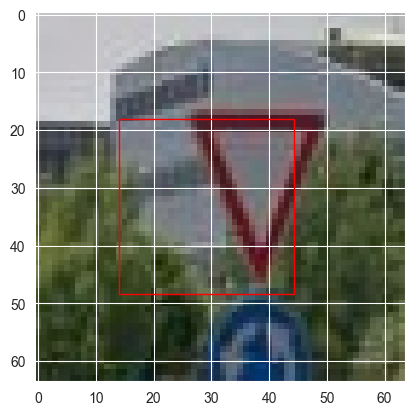

In [11]:
#Show Training results on photos
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model

chinese_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_chinese'
ita_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_ita'

ALL_PATHS = [chinese_PATH, ita_PATH]

generic_path = 'C:\\Users\\marru\\Pictures\\cnns'
save_path = os.path.join(generic_path, model_name)

# Load trained model
model = tf.keras.models.load_model(os.path.join(save_path, model_name+'.h5'))

# 1 of the 3 available paths to pick an image
chosen_path = random.choice(ALL_PATHS)

# Choose random image from the list
image_filenames = [filename[:-4] for filename in os.listdir(chosen_path) if filename.endswith('.jpg')]
image_filename = random.choice(image_filenames)
print(image_filename)

# Paths in which we have the information
image_path = os.path.join(chosen_path, image_filename + '.jpg')

# Load a new image and preprocess it
new_image = Image.open(image_path)
new_image = new_image.resize(image_shape)
new_image_array = np.array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

# Make predictions using the model
predictions = model.predict(new_image_array)

# Retrieve the predicted class labels and regression boxes
predicted_class_labels = predictions[0]  # The first output corresponds to classification
predicted_regression_boxes = predictions[1]  # The second output corresponds to regression

# If you used one-hot encoding for class labels, you can convert them back to class indices
predicted_class_indices = np.argmax(predicted_class_labels, axis=1)

# Now, you have the predicted class labels and regression boxes for the new image
print("Predicted Class Labels:", predicted_class_indices)
print("Predicted Regression Boxes:", predicted_regression_boxes)

# Display the image
plt.imshow(new_image)

# Plot bounding boxes on the image
for box in predicted_regression_boxes:
    x, y, width, height = box  # Extract box coordinates
    x *= new_image.width  # Scale box coordinates to image size
    y *= new_image.height
    width *= new_image.width
    x1 = round(x - width / 2)
    height *= new_image.height
    y1 = round(y - height / 2)
    # Create a rectangle patch
    rect = plt.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Show the image with bounding boxes
plt.show()